In [1]:
!pip install yfinance

     ---------------------------------------- 73.5/73.5 kB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 11.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 3.8/3.8 MB 12.7 MB/s eta 0:00:00
     ---------------------------------------- 112.2/112.2 kB ? eta 0:00:00
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Created wheel for peewee: filename=peewee-3.17.5-py3-none-any.whl size=138680 sha256=a6b1e2b0526555cdf424661357a8cfa69d29817d7ef5ff72da1b064ca5cdb665
  Stored in directory: c:\users\mahin vazifehdan\appdata\local\pip\cache\wheels\f7\47\5a\f60cfd4dd60dad2a4f66a9fabe98dc0b97d82f7112846dbb21
Successfu


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import date, timedelta
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [2]:
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1

d2 = date.today() - timedelta(days = 365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download("GOOG", start= start_date,
                   end = end_date,
                   progress=False)

data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-05,124.610001,127.989998,124.379997,126.629997,126.629997,22672500
1,2023-06-06,126.599998,128.880005,125.970001,127.910004,127.910004,19450100
2,2023-06-07,127.574997,129.550003,122.629997,122.940002,122.940002,34179300
3,2023-06-08,122.584999,123.730003,122.010002,122.669998,122.669998,24815000
4,2023-06-09,122.559998,124.285004,122.419998,122.870003,122.870003,20304500


In [3]:
data = data[["Date", "Close"]]
data.head()

,Date,Close
0,2023-06-05,126.629997
1,2023-06-06,127.910004
2,2023-06-07,122.940002
3,2023-06-08,122.669998
4,2023-06-09,122.870003


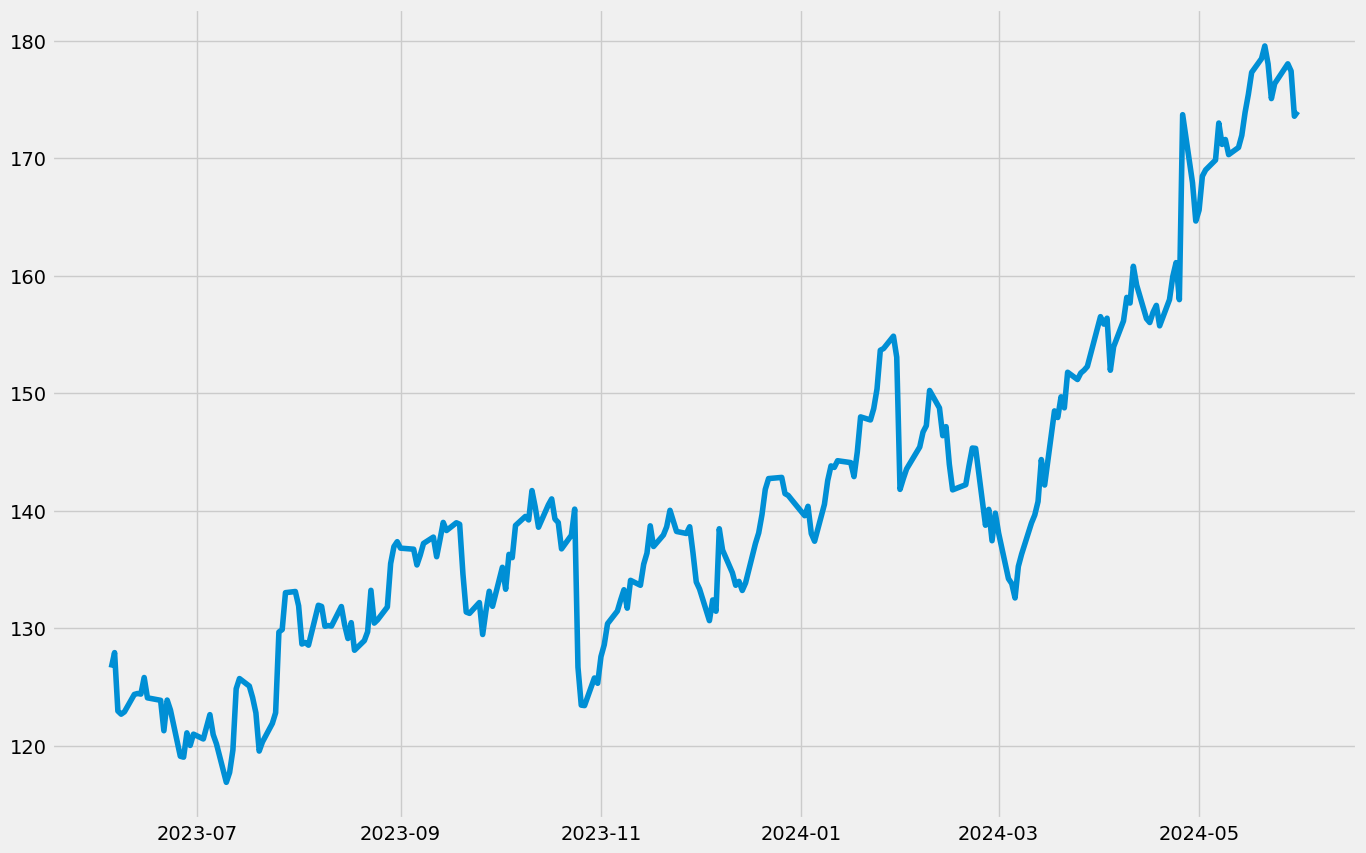

In [6]:
plt.style.use("fivethirtyeight")
plt.figure(figsize = (15,10))
plt.plot(data["Date"], data["Close"])

So our data is not stationary it is seasonal, therefore
We need to use the Seasonal ARIMA (SARIMA) model for Time Series Forecasting on this data


<Figure size 640x480 with 0 Axes>

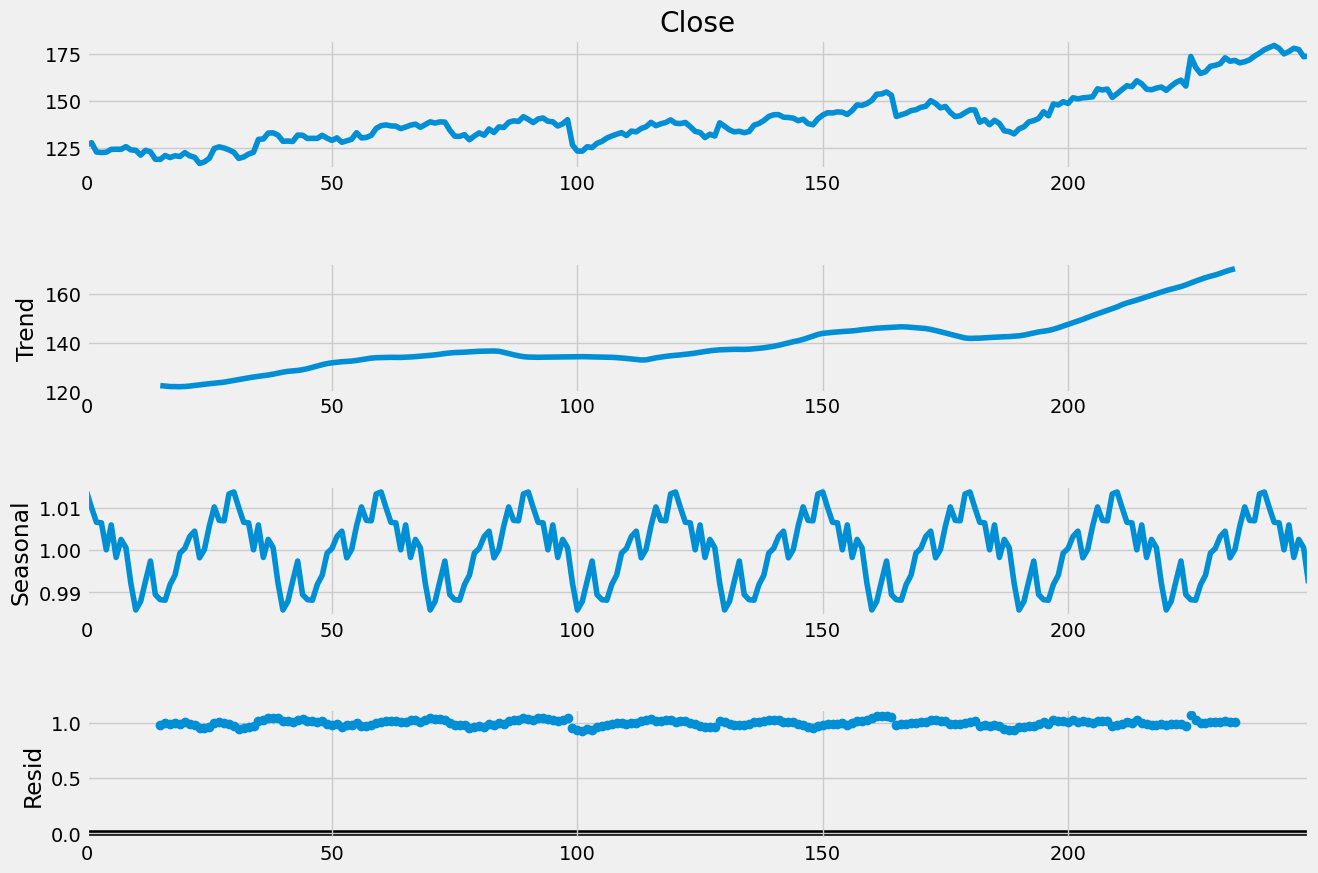

In [15]:
result = seasonal_decompose(data["Close"],
                            model = "multiplicative", 
                            period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15,10)
print("So our data is not stationary it is seasonal, therefore") 
print("We need to use the Seasonal ARIMA (SARIMA) model for Time Series Forecasting on this data")

the curve is moving down after the 5th line of the first boundary.
That is how to decide the p-value. Hence the value of p is 5


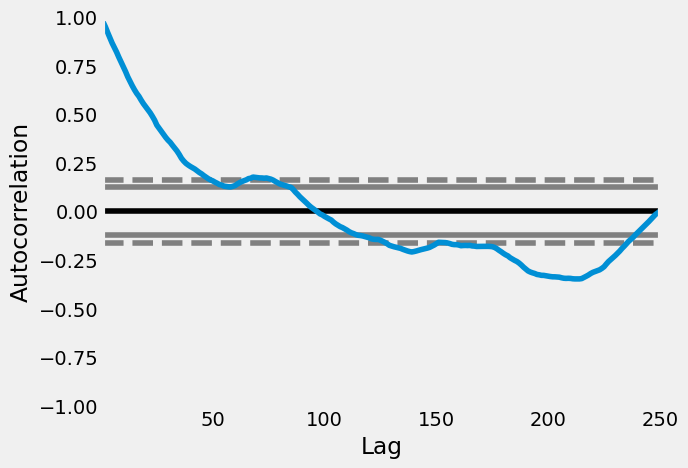

In [18]:
# finding the optimal value of p
pd.plotting.autocorrelation_plot(data["Close"])
print("the curve is moving down after the 5th line of the first boundary.")
print("That is how to decide the p-value. Hence the value of p is 5")

we can see that only two points are far away from all the points.
That is how to decide the q value. Hence the value of q is 2


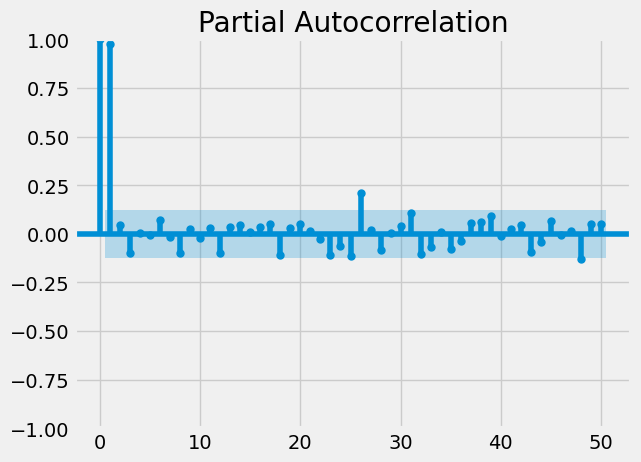

In [25]:
# finding the optimal value of q
plot_pacf(data["Close"], lags = 50)
print("we can see that only two points are far away from all the points.")
print("That is how to decide the q value. Hence the value of q is 2")

In [30]:
p ,d, q = 5,1,2
model = ARIMA(data["Close"], order = (p,d,q))
fitted = model.fit()
print(fitted.summary())

c:\users\mahin vazifehdan\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\mahin vazifehdan\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -580.515
Date:                Sun, 02 Jun 2024   AIC                           1177.030
Time:                        12:16:21   BIC                           1205.169
Sample:                             0   HQIC                          1188.356
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0357      0.548      0.065      0.948      -1.039       1.110
ar.L2         -0.4631      0.540     -0.857      0.392      -1.522       0.596
ar.L3         -0.0973      0.103     -0.948      0.3

In [43]:
# Predict the future stock prices for the next 10 days
prediction = fitted.predict(len(data), 
                           len(data)+10)
print(prediction)

250    173.860897
251    173.710258
252    173.661005
253    174.275493
254    174.276929
255    174.005414
256    173.954057
257    174.106164
258    174.078181
259    174.001985
260    174.032581
Name: predicted_mean, dtype: float64


<AxesSubplot:>

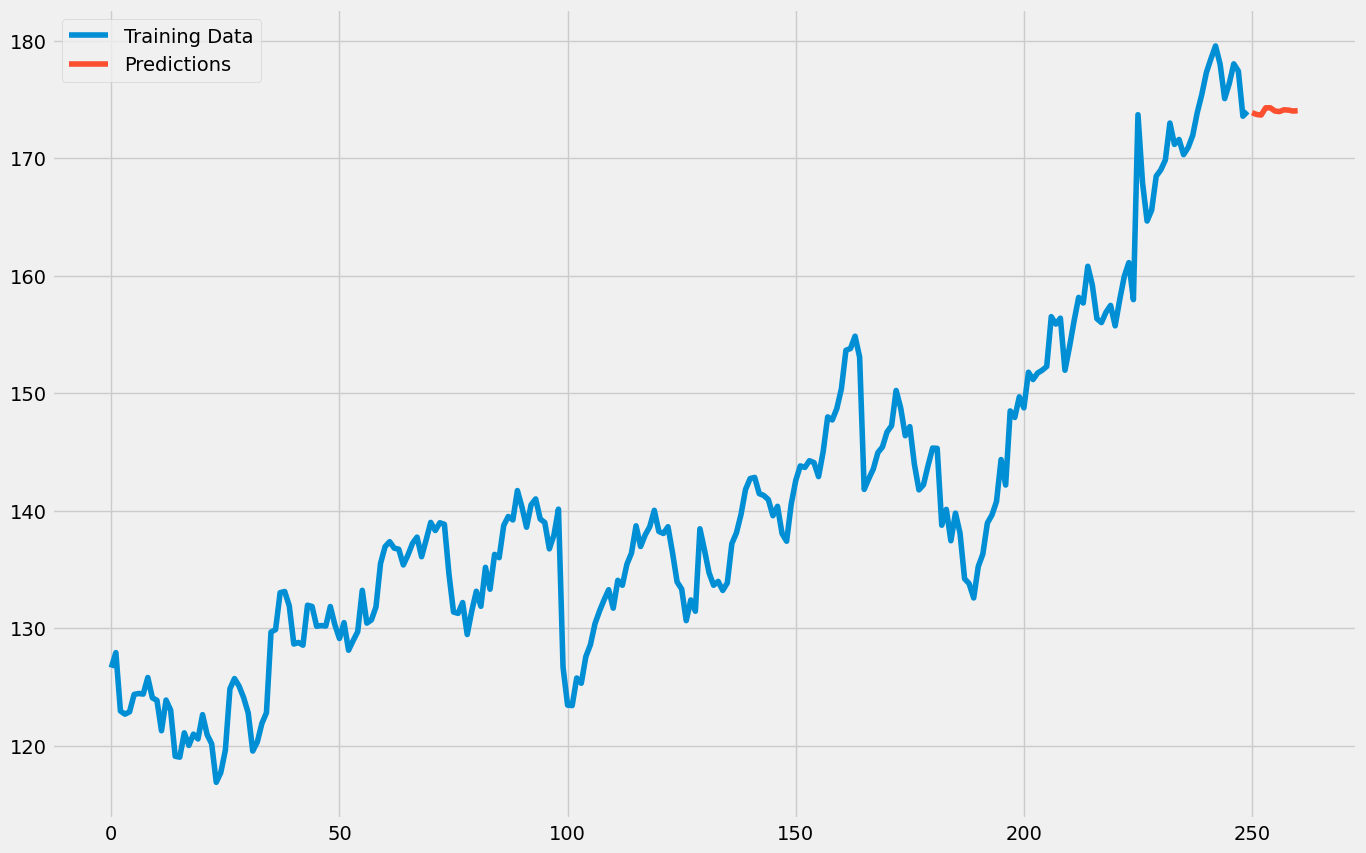

In [44]:
data["Close"].plot(legend=True,
                  label = "Training Data", 
                  figsize = (15,10))

prediction.plot(legend=True,
                label = "Predictions")